In [1]:
import pandas as pd

In [2]:
GS_data_set = {}
data_base_dir = "C:/Users/31155/Dropbox/EV-GasDualNetwork/Data/intermediate/yiwei/intermidiate/GS_cleaned"
for year in range(2013, 2026):
    file_path = f"{data_base_dir}/GS_data_{year}.parquet"
    GS_data_set[year] = pd.read_parquet(file_path)
    print(f"Finished processing year: {year}, Length: {len(GS_data_set[year])}")


Finished processing year: 2013, Length: 101591
Finished processing year: 2014, Length: 104327
Finished processing year: 2015, Length: 118011
Finished processing year: 2016, Length: 119393
Finished processing year: 2017, Length: 118441
Finished processing year: 2018, Length: 107083
Finished processing year: 2019, Length: 113338
Finished processing year: 2020, Length: 119894
Finished processing year: 2021, Length: 121506
Finished processing year: 2022, Length: 110988
Finished processing year: 2023, Length: 118521
Finished processing year: 2024, Length: 118537
Finished processing year: 2025, Length: 107468


In [3]:
for year in range(2013, 2026):
    print(f"Year: {year}")
    print(GS_data_set[year]['小类'].value_counts())
    print("\n")

Year: 2013
小类
加油站      45428
中国石化     32003
中国石油     20831
加气站       2029
中石油碧辟      468
壳牌         345
中石化碧辟      267
道达尔        157
加德士         48
东方           7
美孚           4
埃索           4
Name: count, dtype: int64


Year: 2014
小类
加油站      46961
中国石化     32137
中国石油     21241
加气站       2612
中石油碧辟      500
壳牌         371
中石化碧辟      276
道达尔        170
加德士         46
东方           6
美孚           5
埃索           2
Name: count, dtype: int64


Year: 2015
小类
加油站      51042
中国石化     36360
中国石油     24259
加气站       4200
壳牌         787
中石油碧辟      501
汽车服务       357
中石化碧辟      265
道达尔        106
中化道达尔       61
加德士         45
埃索          13
东方           9
美孚           6
Name: count, dtype: int64


Year: 2016
小类
加油站      51373
中国石化     37099
中国石油     24448
加气站       4271
壳牌         793
中石油碧辟      504
汽车服务       371
中石化碧辟      272
道达尔        118
中化道达尔       70
加德士         46
埃索          13
东方           9
美孚           6
Name: count, dtype: int64


Year: 2017
小类
加油站      52509
中国石化     34669
中国石油    

In [4]:
CNPC_category = ['中国石油','中石油碧辟']
CPCC_category = ['中国石化','中石化碧辟']

def analyze_corporation_filters(data, year):
    """
    Analyze CNPC and CPCC filtering results
    """
    print(f"Year {year}: Total entries: {len(data)}")
    
    # CNPC filters
    cnpc_category_filter = data['小类'].isin(CNPC_category) | data['小类'].str.contains("中石油") | data['小类'].str.contains("中国石油")
    cnpc_name_filter = data['name'].str.contains("中石油") | data['name'].str.contains("中国石油")
    
    cnpc_by_category = len(data[cnpc_category_filter])
    cnpc_by_name = len(data[cnpc_name_filter & ~cnpc_category_filter])
    
    # CPCC filters
    cpcc_category_filter = data['小类'].isin(CPCC_category) | data['小类'].str.contains("中石化") | data['小类'].str.contains("中国石化")
    cpcc_name_filter = data['name'].str.contains("中石化") | data['name'].str.contains("中国石化")
    
    cpcc_by_category = len(data[cpcc_category_filter])
    cpcc_by_name = len(data[cpcc_name_filter & ~cpcc_category_filter])
    
    print(f"  CNPC by category: {cnpc_by_category}, CNPC by name: {cnpc_by_name}")
    print(f"  CPCC by category: {cpcc_by_category}, CPCC by name: {cpcc_by_name}")
    print()
    data.loc[cnpc_category_filter | cnpc_name_filter, 'corporation'] = 'CNPC'
    data.loc[cpcc_category_filter | cpcc_name_filter, 'corporation'] = 'CPCC'
    data['corporation'].fillna('Other', inplace=True)


In [5]:
analyze_corporation_filters(GS_data_set[2025], 2025)

Year 2025: Total entries: 107468
  CNPC by category: 20297, CNPC by name: 832
  CPCC by category: 27385, CPCC by name: 592



In [6]:
GS_data_set[2025]

,id,name,address,wgs84_x,wgs84_y,tel,pname,cityname,adname,大类,中类,小类,updatetime,pname_EN,cityname_EN,corporation
0,B001501DCD,中国石化久华加油站,迎宾大道5501号,121.799499,31.160551,021-68351125,上海市,上海市,浦东新区,汽车服务,加油站,中国石化,2025/6/16 22:26,Shanghai,Shanghai,CPCC
1,B0J3NSTWNI,中国石油加油站(古棕路站),古棕路800弄1-2号,121.907841,30.880990,021-58127160,上海市,上海市,浦东新区,汽车服务,加油站,中国石油,2025/6/15 1:52,Shanghai,Shanghai,CNPC
2,B0FFGWIMRR,中国石化海洪加油站,三星镇海洪港村草棚1129号,121.271779,31.744409,021-59601517,上海市,上海市,崇明区,汽车服务,加油站,中国石化,2025/6/17 2:25,Shanghai,Shanghai,CPCC
3,B0FFGWIMRN,中国石油加油站(崇明第五站),宏海公路4701号,121.279546,31.749067,[],上海市,上海市,崇明区,汽车服务,加油站,中国石油,2025/6/13 12:52,Shanghai,Shanghai,CNPC
4,B0FFG744L0,中国石化海桥加油站,三星镇北桥村三官1033号,121.287427,31.791514,021-59302017,上海市,上海市,崇明区,汽车服务,加油站,中国石化,2025/6/5 7:03,Shanghai,Shanghai,CPCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107463,B0GK1GULQH,徐深燃气CNG加气站,明沈公路东100米,125.263465,45.726444,[],黑龙江省,大庆市,肇州县,汽车服务,加气站,加气站|生活服务,2025/6/12 16:05,Heilongjiang Province,Daqing City,Other
107464,B0FFIDFVL4,万森燃气天然气加气站,先锋路2号,126.751975,45.773061,0451-82482092,黑龙江省,哈尔滨市,道外区,汽车服务,加气站,加气站|生活服务,2025/6/16 22:11,Heilongjiang Province,Harbin City,Other
107465,B01C401QDV,中国石油克东加油站(东三街),复兴街61号,126.248554,48.034976,[],黑龙江省,齐齐哈尔市,克东县,汽车服务,加油站,中国石油|公司企业,2025/6/16 14:02,Heilongjiang Province,Qiqihar City,CNPC
107466,B01C70MIQL,泽升加油站(西园小区),太平路,125.980057,46.043946,13589902382,黑龙江省,绥化市,肇东市,汽车服务,加油站,加油站|公司企业,2025/6/17 11:08,Heilongjiang Province,Suihua City,Other


In [7]:
for year in range(2013,2026):
    analyze_corporation_filters(GS_data_set[year], year)

Year 2013: Total entries: 101591
  CNPC by category: 21299, CNPC by name: 113
  CPCC by category: 32270, CPCC by name: 737

Year 2014: Total entries: 104327
  CNPC by category: 21741, CNPC by name: 121
  CPCC by category: 32413, CPCC by name: 374

Year 2015: Total entries: 118011
  CNPC by category: 24760, CNPC by name: 1783
  CPCC by category: 36625, CPCC by name: 2751

Year 2016: Total entries: 119393
  CNPC by category: 24952, CNPC by name: 1801
  CPCC by category: 37371, CPCC by name: 2781

Year 2017: Total entries: 118441
  CNPC by category: 23880, CNPC by name: 2385
  CPCC by category: 34930, CPCC by name: 3432

Year 2018: Total entries: 107083
  CNPC by category: 23031, CNPC by name: 1856
  CPCC by category: 32511, CPCC by name: 2490

Year 2019: Total entries: 113338
  CNPC by category: 21468, CNPC by name: 1874
  CPCC by category: 28605, CPCC by name: 3461

Year 2020: Total entries: 119894
  CNPC by category: 23058, CNPC by name: 1279
  CPCC by category: 30545, CPCC by name: 26

Year 2013: CNPC 21.1%, CPCC 32.5%, Other 46.4%
Year 2014: CNPC 20.9%, CPCC 31.4%, Other 47.6%
Year 2015: CNPC 22.4%, CPCC 33.4%, Other 44.2%
Year 2016: CNPC 22.3%, CPCC 33.6%, Other 44.1%
Year 2017: CNPC 22.1%, CPCC 32.4%, Other 45.5%
Year 2018: CNPC 23.2%, CPCC 32.7%, Other 44.1%
Year 2019: CNPC 20.6%, CPCC 28.3%, Other 51.1%
Year 2020: CNPC 20.3%, CPCC 27.7%, Other 52.1%
Year 2021: CNPC 19.9%, CPCC 26.9%, Other 53.2%
Year 2022: CNPC 20.2%, CPCC 27.8%, Other 52.0%
Year 2023: CNPC 19.8%, CPCC 27.3%, Other 52.9%
Year 2024: CNPC 19.9%, CPCC 27.3%, Other 52.9%
Year 2025: CNPC 19.7%, CPCC 26.0%, Other 54.3%


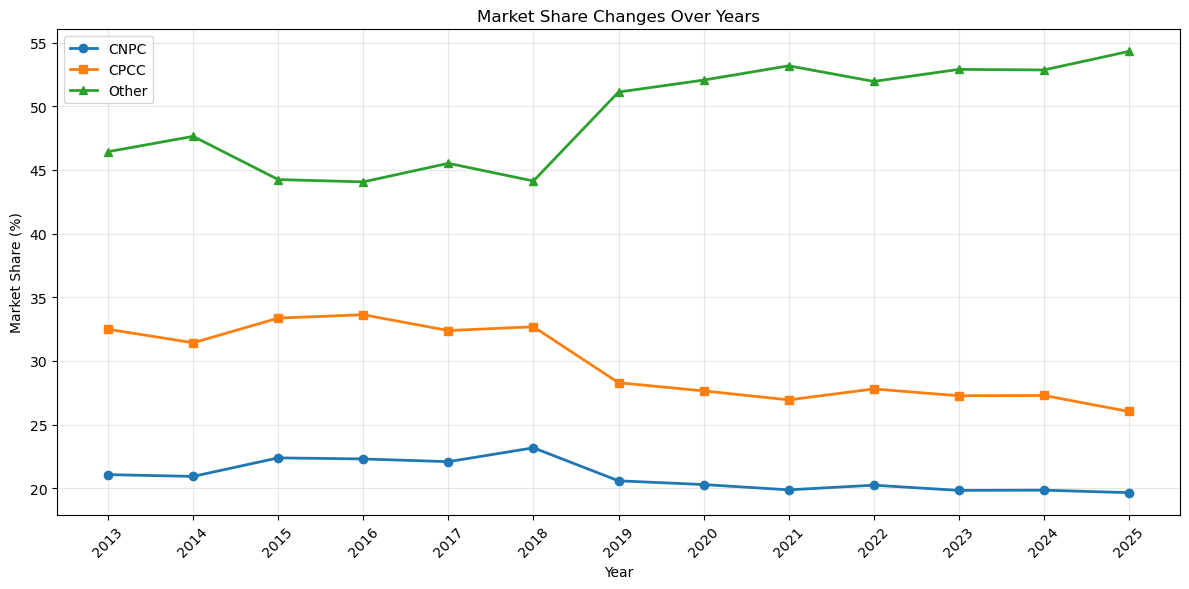

In [8]:
import matplotlib.pyplot as plt

def plot_market_share():
    """
    Plot market share changes over years
    """
    years = []
    cnpc_ratios = []
    cpcc_ratios = []
    other_ratios = []
    
    for year in range(2013, 2026):
        data = GS_data_set[year]
        total = len(data)
        
        cnpc_count = data['corporation'].value_counts().get('CNPC', 0)
        cpcc_count = data['corporation'].value_counts().get('CPCC', 0)
        other_count = data['corporation'].value_counts().get('Other', 0)
        
        years.append(year)
        cnpc_ratios.append(cnpc_count / total * 100)
        cpcc_ratios.append(cpcc_count / total * 100)
        other_ratios.append(other_count / total * 100)
        
        print(f"Year {year}: CNPC {cnpc_ratios[-1]:.1f}%, CPCC {cpcc_ratios[-1]:.1f}%, Other {other_ratios[-1]:.1f}%")
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(years, cnpc_ratios, marker='o', label='CNPC', linewidth=2)
    plt.plot(years, cpcc_ratios, marker='s', label='CPCC', linewidth=2)
    plt.plot(years, other_ratios, marker='^', label='Other', linewidth=2)
    
    plt.xlabel('Year')
    plt.ylabel('Market Share (%)')
    plt.title('Market Share Changes Over Years')
    plt.xticks(years, rotation=45)  # Show all years on x-axis
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_market_share()

In [9]:
GS_data_set[2021]

,id,name,address,wgs84_x,wgs84_y,tel,pname,cityname,adname,大类,中类,小类,pname_EN,cityname_EN,corporation
0,B0FFMFRNQG,桃花加油站,艾亭镇,115.187094,32.686149,[],安徽省,阜阳市,临泉县,汽车服务,加油站,加油站,Anhui Province,Fuyang City,Other
1,B0FFM6K64P,闫集加油站(暂停营业),艾亭镇韦艾路,115.192077,32.704654,13965739950,安徽省,阜阳市,临泉县,汽车服务,加油站,加油站,Anhui Province,Fuyang City,Other
2,B0FFMFRUX5,加油站(暂停营业),006县道,115.189144,32.875579,13665589188;0558-6188188,安徽省,阜阳市,临泉县,汽车服务,加油站,加油站,Anhui Province,Fuyang City,Other
3,B0FFMHGTMH,臻龙加油站(暂停营业),臻龙建材销售有限公司(106国道),114.915242,32.975117,[],安徽省,阜阳市,临泉县,汽车服务,加油站,加油站,Anhui Province,Fuyang City,Other
4,B0G12LMJJD,天杰能源加油站(中国.安徽),京广线庙岔中心幼儿园西北侧约300米,114.907860,32.991422,[],安徽省,阜阳市,临泉县,汽车服务,加油站,加油站,Anhui Province,Fuyang City,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121584,B0IDX5WTHS,石家加油站,石垫路,108.381981,30.762569,023-81507789,重庆市,重庆市,石柱土家族自治县,汽车服务,加油站,加油站,Chongqing City,Chongqing City,Other
121585,B0IDCCBGEP,罗田加油站,罗田镇天生社会二组300号,108.391387,30.769405,[],重庆市,重庆市,万州区,汽车服务,加油站,加油站,Chongqing City,Chongqing City,Other
121586,B00179ARLL,中国石化加油站(一碗水站),348国道与诗城中路交叉口东南380米,108.383636,30.788466,023-56594738,重庆市,重庆市,奉节县,汽车服务,加油站,中国石化,Chongqing City,Chongqing City,CPCC
121587,B0IU1GWBFM,林家沟加油站,301省道与105省道交叉口东北40米,108.381598,30.782453,[],重庆市,重庆市,巫山县,汽车服务,加油站,加油站,Chongqing City,Chongqing City,Other


In [10]:
for year in range(2013, 2026):
    print(f"Year {year} - Corporation Counts:")
    print(GS_data_set[year]['corporation'].value_counts())
    print("\n")

Year 2013 - Corporation Counts:
corporation
Other    47173
CPCC     33007
CNPC     21411
Name: count, dtype: int64


Year 2014 - Corporation Counts:
corporation
Other    49698
CPCC     32787
CNPC     21842
Name: count, dtype: int64


Year 2015 - Corporation Counts:
corporation
Other    52211
CPCC     39376
CNPC     26424
Name: count, dtype: int64


Year 2016 - Corporation Counts:
corporation
Other    52609
CPCC     40152
CNPC     26632
Name: count, dtype: int64


Year 2017 - Corporation Counts:
corporation
Other    53912
CPCC     38362
CNPC     26167
Name: count, dtype: int64


Year 2018 - Corporation Counts:
corporation
Other    47258
CPCC     35001
CNPC     24824
Name: count, dtype: int64


Year 2019 - Corporation Counts:
corporation
Other    57935
CPCC     32066
CNPC     23337
Name: count, dtype: int64


Year 2020 - Corporation Counts:
corporation
Other    62410
CPCC     33151
CNPC     24333
Name: count, dtype: int64


Year 2021 - Corporation Counts:
corporation
Other    64610
CPCC 

In [11]:
for year in range(2013, 2026):
    GS_data_set[year].to_parquet(f"{data_base_dir}/GS_data_{year}.parquet")